In [31]:
import cv2
import sys
import numpy as np
from os.path import join
import matplotlib.pyplot as plt

PATH = 'C:\\Users\\marco\\Google Drive\\ComputerScience\\Visão Computacional\\images\\Skol'

In [32]:
# caso haja mudanças em BeerClassification, reload permite atualizar sem restart do kernel
import projeto_helper
from projeto_helper import BeerClassification

import importlib
importlib.reload(projeto_helper)

<module 'projeto_helper' from 'c:\\CS\\projetoVC\\projeto_helper.py'>

In [33]:
bc = BeerClassification(PATH, ['0'])
for i, label in enumerate(bc.labels):
    print(i, label)

0 0_v000_0.jpg
1 0_v000_45L.jpg
2 0_v000_45R.jpg
3 0_v001_0.jpg
4 0_v001_45L.jpg
5 0_v001_45R.jpg
6 0_v002_0.jpg
7 0_v002_45L.jpg
8 0_v002_45R.jpg
9 0_v003_0.jpg
10 0_v003_45L.jpg
11 0_v003_45R.jpg
12 0_v004_0.jpg
13 0_v004_45L.jpg
14 0_v004_45R.jpg
15 0_v005_0.jpg
16 0_v005_45L.jpg
17 0_v005_45R.jpg
18 0_v006_0.jpg
19 0_v006_45L.jpg
20 0_v006_45R.jpg
21 0_v007_0.jpg
22 0_v007_45L.jpg
23 0_v007_45R.jpg
24 0_v008_0.jpg
25 0_v008_45L.jpg
26 0_v008_45R.jpg
27 0_v009_0.jpg
28 0_v009_45L.jpg
29 0_v009_45R.jpg
30 0_v010_0.jpg
31 0_v010_45L.jpg
32 0_v010_45R.jpg
33 0_v011_0.jpg
34 0_v011_45L.jpg
35 0_v011_45R.jpg
36 0_v012_0.jpg
37 0_v012_45L.jpg
38 0_v012_45R.jpg
39 0_v013_0.jpg
40 0_v013_45L.jpg
41 0_v013_45R.jpg
42 0_v014_0.jpg
43 0_v014_45L.jpg
44 0_v014_45R.jpg
45 0_v015_0.jpg
46 0_v015_45L.jpg
47 0_v015_45R.jpg
48 0_v016_0.jpg
49 0_v016_45L.jpg
50 0_v016_45R.jpg
51 0_v017_0.jpg
52 0_v017_45L.jpg
53 0_v017_45R.jpg
54 0_v018_0.jpg
55 0_v018_45L.jpg
56 0_v018_45R.jpg
57 0_v019_0.jpg
58 0_v

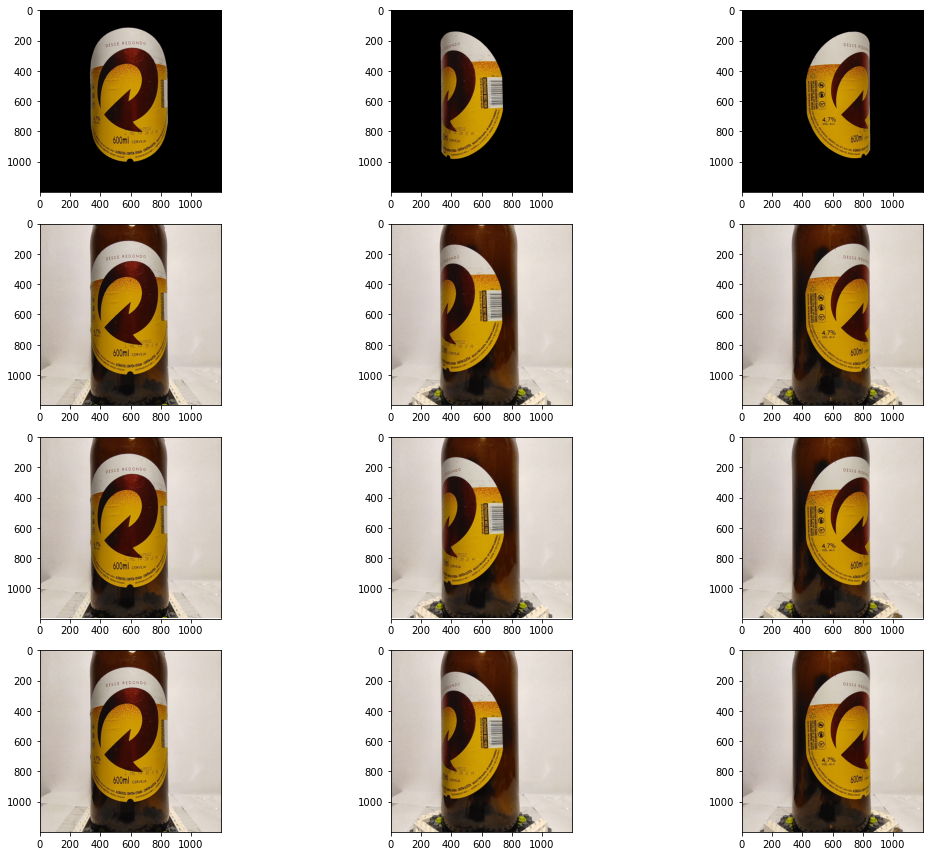

In [35]:
query_imgs = np.array([
    plt.imread(bc.imgs[0]), 
    plt.imread(bc.imgs[1]), 
    plt.imread(bc.imgs[2])
], dtype=np.uint8)

masks = np.array([
    plt.imread(join(PATH, 'mask0.jpg')),
    plt.imread(join(PATH, 'mask45L.jpg')),
    plt.imread(join(PATH, 'mask45R.jpg'))
], dtype=np.uint8)

for i in range(3):
    query_imgs[i] = cv2.bitwise_and(query_imgs[i], masks[i])

train_imgs = []
for k in range(3, len(bc.labels), 6):
    for i in range(k, k + 3):
        train_imgs.append(plt.imread(bc.imgs[i]))
train_imgs = np.array(train_imgs, dtype=np.uint8)

fig, axs = plt.subplots(4, 3, figsize=(16, 12))
axs[0, 0].imshow(query_imgs[0])
axs[0, 1].imshow(query_imgs[1])
axs[0, 2].imshow(query_imgs[2])
for row in range(1, 4):
    for col in range(3):
        axs[row, col].imshow(train_imgs[row * 3 + col])
plt.tight_layout()
plt.show()

# ______________________________________

In [23]:
hist_size = [35]
ranges = [0, 34]
threshold_value = 50

hist_results_rgb = np.array([
    np.array([np.zeros(*hist_size, dtype=np.float32)] * 3), 
    np.array([np.zeros(*hist_size, dtype=np.float32)] * 3),
    np.array([np.zeros(*hist_size, dtype=np.float32)] * 3),
])
hist_results_gray = np.array([
    np.zeros(*hist_size, dtype=np.float32), 
    np.zeros(*hist_size, dtype=np.float32), 
    np.zeros(*hist_size, dtype=np.float32), 
])
thresh = [0, 0, 0]

for i in range(0, len(train_imgs), 3):
    for rot in range(3):
        img_diff = bc.processGetDiff(query_imgs[rot], masks[rot], train_imgs[i + rot])
        # rgb histogram
        hist = []
        for c in range(3):
            h = cv2.calcHist([img_diff], [c], None, hist_size, ranges).reshape(*hist_size)
            h = h.reshape(35)
            hist.append(h / np.sum(h))
        hist_results_rgb[rot] += hist
        # gray histogram
        img_diff_gray = cv2.cvtColor(img_diff, cv2.COLOR_RGB2GRAY)
        h = cv2.calcHist([img_diff_gray], [0], None, hist_size, ranges).reshape(*hist_size)
        hist_results_gray[rot] += h / np.sum(h)
        # threshold sum
        _, img_diff_thresh = cv2.threshold(img_diff_gray, threshold_value, 1, cv2.THRESH_BINARY)
        thresh[rot] += np.sum(img_diff_thresh)

In [27]:
for rot in range(3):
    for channel in range(3):
        hist_results_rgb[rot, channel] /= len(idx) / 3
    hist_results_gray[rot] /= len(idx) / 3
    thresh[rot] //= (len(idx) / 3)

In [28]:
bc = BeerClassification(PATH, ['0', '1'])
for i, label in enumerate(bc.labels):
    print(i, label)

0 0_v000_0.jpg
1 0_v000_45L.jpg
2 0_v000_45R.jpg
3 0_v001_0.jpg
4 0_v001_45L.jpg
5 0_v001_45R.jpg
6 0_v002_0.jpg
7 0_v002_45L.jpg
8 0_v002_45R.jpg
9 0_v003_0.jpg
10 0_v003_45L.jpg
11 0_v003_45R.jpg
12 0_v004_0.jpg
13 0_v004_45L.jpg
14 0_v004_45R.jpg
15 0_v005_0.jpg
16 0_v005_45L.jpg
17 0_v005_45R.jpg
18 0_v006_0.jpg
19 0_v006_45L.jpg
20 0_v006_45R.jpg
21 0_v007_0.jpg
22 0_v007_45L.jpg
23 0_v007_45R.jpg
24 0_v008_0.jpg
25 0_v008_45L.jpg
26 0_v008_45R.jpg
27 0_v009_0.jpg
28 0_v009_45L.jpg
29 0_v009_45R.jpg
30 0_v010_0.jpg
31 0_v010_45L.jpg
32 0_v010_45R.jpg
33 0_v011_0.jpg
34 0_v011_45L.jpg
35 0_v011_45R.jpg
36 0_v012_0.jpg
37 0_v012_45L.jpg
38 0_v012_45R.jpg
39 0_v013_0.jpg
40 0_v013_45L.jpg
41 0_v013_45R.jpg
42 0_v014_0.jpg
43 0_v014_45L.jpg
44 0_v014_45R.jpg
45 0_v015_0.jpg
46 0_v015_45L.jpg
47 0_v015_45R.jpg
48 0_v016_0.jpg
49 0_v016_45L.jpg
50 0_v016_45R.jpg
51 0_v017_0.jpg
52 0_v017_45L.jpg
53 0_v017_45R.jpg
54 0_v018_0.jpg
55 0_v018_45L.jpg
56 0_v018_45R.jpg
57 0_v019_0.jpg
58 0_v

In [8]:
# bc.processGetDiffAllImages(query_imgs, [0, 1, 2], masks, folder_path='temp')

In [29]:
results_0 = bc.compareHistogramAllImages(hist_results_rgb[0], hist_results_gray[0], 'imgs_diff', '0', hist_size, ranges)
results_45L = bc.compareHistogramAllImages(hist_results_rgb[1], hist_results_gray[1], 'imgs_diff', '45L', hist_size, ranges)
results_45R = bc.compareHistogramAllImages(hist_results_rgb[2], hist_results_gray[2], 'imgs_diff', '45R', hist_size, ranges)

In [10]:
acc_0 = bc.predictAndScoreSVM(results_0)
acc_45L = bc.predictAndScoreSVM(results_45L)
acc_45R = bc.predictAndScoreSVM(results_45R)

print('Acc 45L:', acc_45L)
print('Acc 0:  ', acc_0)
print('Acc 45R:', acc_45R)

Acc 45L: 0.5135135135135135
Acc 0:   0.4864864864864865
Acc 45R: 0.4864864864864865
